In [1]:
from keras.datasets import mnist

2022-10-25 18:03:44.046278: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-10-25 18:03:44.046388: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
(train_images,train_labels),(test_images,test_labels)=mnist.load_data()

In [3]:
print(train_images.shape)

(60000, 28, 28)


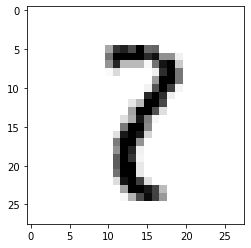

2


In [9]:
import matplotlib.pyplot as plt
sira=588
plt.imshow(train_images[sira],cmap=plt.cm.binary)
plt.show()
print(train_labels[sira])

In [11]:
from keras import models
from keras import layers

In [13]:
network = models.Sequential()
network.add(layers.Dense(512,activation="relu",input_shape=(28*28,)))
network.add(layers.Dense(128,activation="relu"))
network.add(layers.Dense(128,activation="relu"))
network.add(layers.Dense(10,activation="softmax"))
network.compile(optimizer="rmsprop",loss="categorical_crossentropy",metrics=["accuracy"])

In [14]:
train_images=train_images.reshape((60_000,28*28))
train_images=train_images.astype("float32")/255

In [15]:
from tensorflow.keras.utils import to_categorical
train_labels=to_categorical(train_labels)

In [16]:
network.fit(train_images,train_labels,epochs=5,batch_size=128)

2022-10-25 19:18:08.349678: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 188160000 exceeds 10% of free system memory.


Epoch 1/5
469/469 [==============================] - 21s 35ms/step - loss: 0.2503 - accuracy: 0.9240
Epoch 2/5
469/469 [==============================] - 15s 33ms/step - loss: 0.0915 - accuracy: 0.9722
Epoch 3/5
469/469 [==============================] - 16s 34ms/step - loss: 0.0611 - accuracy: 0.9814
Epoch 4/5
469/469 [==============================] - 17s 37ms/step - loss: 0.0448 - accuracy: 0.9867
Epoch 5/5
469/469 [==============================] - 17s 37ms/step - loss: 0.0336 - accuracy: 0.9892


In [17]:
network.save("mnist_ann_model.h5")

In [71]:
import cv2
resim=cv2.imread("/home/serkan/Belgeler/yillar/2022-2023/2022-oyg2-a1/yapay_zeka/rakam8_2.png")
resim.shape

(28, 28, 3)

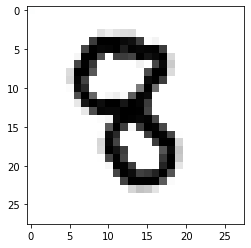

In [72]:
plt.imshow(resim,cmap=plt.cm.binary)
plt.show()


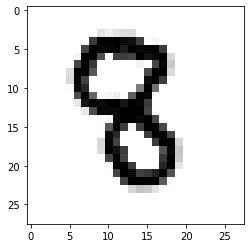

In [73]:
resim=cv2.cvtColor(resim,cv2.COLOR_BGR2GRAY)
resim=cv2.bitwise_not(resim)
# resim=cv2.resize(resim,(28,28),interpolation=cv2.INTER_LINEAR)
# resim=cv2.morphologyEx(resim,cv2.MORPH_OPEN,(5,5))
plt.imshow(resim,cmap=plt.cm.binary)
plt.show()
